<a href="https://colab.research.google.com/github/NavaneethaCSR/Sociability-Level-Prediction/blob/main/Sociability_level_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import  StandardScaler
from sklearn.metrics import accuracy_score,precision_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Datasets/Sociability  level prediction/SOCIALABILITY PREDICTION - Form responses 1.xlsx')
data

,FULL NAME,GENDER,AGE,COMMUNICATION SKILL,SOCIAL INITIATIVE,ENERGY LEVEL,COLLABORATIVE NATURE,EXPRESSIVENESS,ADAPTABILITY,SOCIAL LEVEL
0,Navaneetha CSR,Female,22,3,4,4,2,2,2,AMBIVERT
1,JAYANTHI T V,Female,33,3,1,3,3,4,2,AMBIVERT
2,Sandra M,Female,24,3,3,3,4,3,3,AMBIVERT
3,Padma Dinesh,Female,21,3,3,3,3,2,2,AMBIVERT
4,Merin,Female,23,1,1,2,3,2,1,INTROVERT
...,...,...,...,...,...,...,...,...,...,...
110,Sreejesh T S,Male,23,3,4,4,4,3,2,AMBIVERT
111,Akhil K A,Male,26,4,5,4,4,4,4,EXTROVERT
112,Karthik Girish,Male,25,5,4,5,5,5,5,EXTROVERT
113,Harikrishnan A,Male,22,4,3,4,4,3,3,EXTROVERT


In [ ]:
data1 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Datasets/Sociability  level prediction/social_train.xlsx')
data1

,FULL NAME,GENDER,AGE,COMMUNICATION SKILL,SOCIAL INITIATIVE,ENERGY LEVEL,COLLABORATIVE NATURE,EXPRESSIVENESS,ADAPTABILITY,SOCIAL LEVEL
0,Navaneetha CSR,Female,22,3,4,4,2,2,2,AMBIVERT
1,JAYANTHI T V,Female,33,3,1,3,3,4,2,AMBIVERT
2,Sandra M,Female,24,3,3,3,4,3,3,AMBIVERT
3,Padma Dinesh,Female,21,3,3,3,3,2,2,AMBIVERT
4,Merin,Female,23,1,1,2,3,2,1,INTROVERT
5,DIYA MIRZA K I,Female,23,2,3,3,4,3,2,AMBIVERT
6,Aleesha,Female,24,4,4,4,3,3,4,EXTROVERT
7,Ashna Shanavas,Female,22,3,4,4,4,1,3,AMBIVERT
8,Renjitha,Female,27,4,4,5,5,5,5,EXTROVERT
9,Anjana R,Female,22,3,2,3,3,5,4,AMBIVERT


In [ ]:
data1['GENDER']=data1['GENDER'].map({'Male':0,'Female':1})
data1

,FULL NAME,GENDER,AGE,COMMUNICATION SKILL,SOCIAL INITIATIVE,ENERGY LEVEL,COLLABORATIVE NATURE,EXPRESSIVENESS,ADAPTABILITY,SOCIAL LEVEL
0,Navaneetha CSR,1,22,3,4,4,2,2,2,AMBIVERT
1,JAYANTHI T V,1,33,3,1,3,3,4,2,AMBIVERT
2,Sandra M,1,24,3,3,3,4,3,3,AMBIVERT
3,Padma Dinesh,1,21,3,3,3,3,2,2,AMBIVERT
4,Merin,1,23,1,1,2,3,2,1,INTROVERT
5,DIYA MIRZA K I,1,23,2,3,3,4,3,2,AMBIVERT
6,Aleesha,1,24,4,4,4,3,3,4,EXTROVERT
7,Ashna Shanavas,1,22,3,4,4,4,1,3,AMBIVERT
8,Renjitha,1,27,4,4,5,5,5,5,EXTROVERT
9,Anjana R,1,22,3,2,3,3,5,4,AMBIVERT


In [ ]:
input_cols = ['GENDER','AGE','COMMUNICATION SKILL','SOCIAL INITIATIVE','ENERGY LEVEL','COLLABORATIVE  NATURE','EXPRESSIVENESS','ADAPTABILITY']
output_cols = ['SOCIAL LEVEL']

In [ ]:
data1[input_cols] = data1[input_cols].fillna(data1[input_cols].mean())

In [ ]:
scaler = StandardScaler()
data1[input_cols] = scaler.fit_transform(data1[input_cols])
data1

,FULL NAME,GENDER,AGE,COMMUNICATION SKILL,SOCIAL INITIATIVE,ENERGY LEVEL,COLLABORATIVE NATURE,EXPRESSIVENESS,ADAPTABILITY,SOCIAL LEVEL
0,Navaneetha CSR,0.133631,-0.371818,0.242318,1.238697,0.389581,-1.319950,-0.795307,-0.836025,AMBIVERT
1,JAYANTHI T V,0.133631,3.513683,0.242318,-1.585532,-0.464501,-0.355371,0.823711,-0.836025,AMBIVERT
2,Sandra M,0.133631,0.334636,0.242318,0.297287,-0.464501,0.609208,0.014202,0.030401,AMBIVERT
3,Padma Dinesh,0.133631,-0.725046,0.242318,0.297287,-0.464501,-0.355371,-0.795307,-0.836025,AMBIVERT
4,Merin,0.133631,-0.018591,-1.730840,-1.585532,-1.318583,-0.355371,-0.795307,-1.702450,INTROVERT
5,DIYA MIRZA K I,0.133631,-0.018591,-0.744261,0.297287,-0.464501,0.609208,0.014202,-0.836025,AMBIVERT
6,Aleesha,0.133631,0.334636,1.228896,1.238697,0.389581,-0.355371,0.014202,0.896826,EXTROVERT
7,Ashna Shanavas,0.133631,-0.371818,0.242318,1.238697,0.389581,0.609208,-1.604816,0.030401,AMBIVERT
8,Renjitha,0.133631,1.394319,1.228896,1.238697,1.243664,1.573787,1.633220,1.763252,EXTROVERT
9,Anjana R,0.133631,-0.371818,0.242318,-0.644122,-0.464501,-0.355371,1.633220,0.896826,AMBIVERT


In [ ]:
X_train= data1[input_cols]
Y_train = data1[output_cols]


In [ ]:
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train, Y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=42)

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [ ]:

base_classifier = DecisionTreeClassifier(max_depth=1)
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)
adaboost_classifier.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)

<ipython-input-13-05e0c8642c64>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,Y_train)


RandomForestClassifier()

In [ ]:
data2 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Datasets/Sociability  level prediction/social_test.xlsx')
data2

,FULL NAME,GENDER,AGE,COMMUNICATION SKILL,SOCIAL INITIATIVE,ENERGY LEVEL,COLLABORATIVE NATURE,EXPRESSIVENESS,ADAPTABILITY,SOCIAL LEVEL
0,Devika Devadas,Female,26,3,1,3,3,4,5,AMBIVERT
1,Ann Steveena Pereira,Female,23,2,4,3,3,3,2,AMBIVERT
2,Merin T Felix,Female,24,3,1,2,2,2,3,AMBIVERT
3,Agnel josy,Female,22,5,3,4,3,4,4,EXTROVERT
4,Priyanga,Female,24,3,4,1,5,3,4,AMBIVERT
5,Sreelakshmi Suresh,Female,22,4,3,4,3,2,2,AMBIVERT
6,Libiya Gilbert,Female,22,4,4,4,4,3,5,EXTROVERT
7,Shwetha,Female,20,3,4,4,5,2,3,EXTROVERT
8,Sreelakshmi B S,Female,21,3,3,4,4,3,3,AMBIVERT
9,Athira E,Female,22,3,3,4,3,3,3,AMBIVERT


In [ ]:
data2['GENDER']=data2['GENDER'].map({'Male':0,'Female':1})
data2

,FULL NAME,GENDER,AGE,COMMUNICATION SKILL,SOCIAL INITIATIVE,ENERGY LEVEL,COLLABORATIVE NATURE,EXPRESSIVENESS,ADAPTABILITY,SOCIAL LEVEL
0,Devika Devadas,1,26,3,1,3,3,4,5,AMBIVERT
1,Ann Steveena Pereira,1,23,2,4,3,3,3,2,AMBIVERT
2,Merin T Felix,1,24,3,1,2,2,2,3,AMBIVERT
3,Agnel josy,1,22,5,3,4,3,4,4,EXTROVERT
4,Priyanga,1,24,3,4,1,5,3,4,AMBIVERT
5,Sreelakshmi Suresh,1,22,4,3,4,3,2,2,AMBIVERT
6,Libiya Gilbert,1,22,4,4,4,4,3,5,EXTROVERT
7,Shwetha,1,20,3,4,4,5,2,3,EXTROVERT
8,Sreelakshmi B S,1,21,3,3,4,4,3,3,AMBIVERT
9,Athira E,1,22,3,3,4,3,3,3,AMBIVERT


In [ ]:
data2[input_cols] = data2[input_cols].fillna(data1[input_cols].mean())

In [ ]:
data2[input_cols] = scaler.fit_transform(data2[input_cols])
data2

,FULL NAME,GENDER,AGE,COMMUNICATION SKILL,SOCIAL INITIATIVE,ENERGY LEVEL,COLLABORATIVE NATURE,EXPRESSIVENESS,ADAPTABILITY,SOCIAL LEVEL
0,Devika Devadas,1.600781,1.506144,-0.306987,-1.631825,-0.312207,-0.483432,0.797644,1.515229,AMBIVERT
1,Ann Steveena Pereira,1.600781,0.198780,-1.279111,0.904921,-0.312207,-0.483432,-0.076696,-1.363706,AMBIVERT
2,Merin T Felix,1.600781,0.634568,-0.306987,-1.631825,-1.300861,-1.372322,-0.951037,-0.404061,AMBIVERT
3,Agnel josy,1.600781,-0.237007,1.637262,0.059339,0.676448,-0.483432,0.797644,0.555584,EXTROVERT
4,Priyanga,1.600781,0.634568,-0.306987,0.904921,-2.289515,1.294349,-0.076696,0.555584,AMBIVERT
5,Sreelakshmi Suresh,1.600781,-0.237007,0.665138,0.059339,0.676448,-0.483432,-0.951037,-1.363706,AMBIVERT
6,Libiya Gilbert,1.600781,-0.237007,0.665138,0.904921,0.676448,0.405459,-0.076696,1.515229,EXTROVERT
7,Shwetha,1.600781,-1.108583,-0.306987,0.904921,0.676448,1.294349,-0.951037,-0.404061,EXTROVERT
8,Sreelakshmi B S,1.600781,-0.672795,-0.306987,0.059339,0.676448,0.405459,-0.076696,-0.404061,AMBIVERT
9,Athira E,1.600781,-0.237007,-0.306987,0.059339,0.676448,-0.483432,-0.076696,-0.404061,AMBIVERT


In [ ]:
X_test = data2[input_cols]
Y_test = data2[output_cols]


In [ ]:
predictions = svm_classifier.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)
precision = precision_score(Y_test, predictions, average='weighted')

print(accuracy)
print(precision)


0.9122807017543859
0.9221690590111643


In [ ]:
predictions = knn_classifier.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)
precision = precision_score(Y_test, predictions, average='weighted')

print(accuracy)
print(precision)


0.8771929824561403
0.8799043062200957


In [ ]:
predictions = adaboost_classifier.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)
precision = precision_score(Y_test, predictions, average='weighted')

print(accuracy)
print(precision)


0.5614035087719298
0.6314393410582158


In [ ]:
predictions = rf.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)
precision = precision_score(Y_test, predictions, average='weighted')

print(accuracy)
print(precision)


0.8596491228070176
0.8706685013186561


In [ ]:
y_pred =  svm_classifier.predict(X_test)
df=pd.DataFrame(y_pred)
df.rename(columns = {0:'SOCIAL LEVEL'},inplace=True)
df1=pd.DataFrame(data2['FULL NAME'])
value =pd.concat([df1,df], axis=1)
value


,FULL NAME,SOCIAL LEVEL
0,Devika Devadas,AMBIVERT
1,Ann Steveena Pereira,AMBIVERT
2,Merin T Felix,AMBIVERT
3,Agnel josy,EXTROVERT
4,Priyanga,AMBIVERT
5,Sreelakshmi Suresh,AMBIVERT
6,Libiya Gilbert,EXTROVERT
7,Shwetha,AMBIVERT
8,Sreelakshmi B S,AMBIVERT
9,Athira E,AMBIVERT


In [ ]:
print(data2['SOCIAL LEVEL'].value_counts()['INTROVERT'])
print(data2['SOCIAL LEVEL'].value_counts()['AMBIVERT'])
print(data2['SOCIAL LEVEL'].value_counts()['EXTROVERT'])

4
30
23


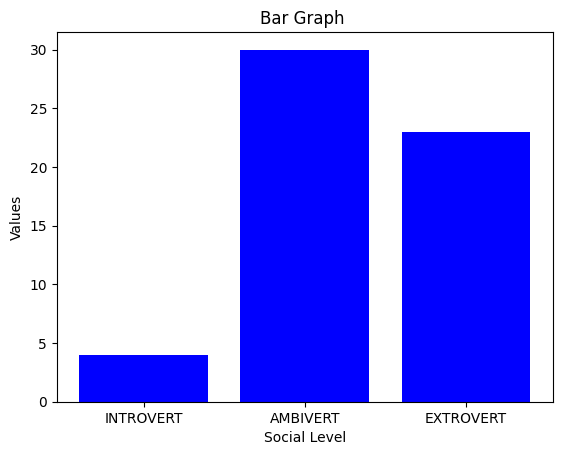

In [ ]:
import matplotlib.pyplot as plt
# Sample data
categories = ['INTROVERT', 'AMBIVERT', 'EXTROVERT']
values = [4,30,23]

# Plot the bar graph
plt.bar(categories, values, color='blue')

# Add labels and title
plt.xlabel('Social Level')
plt.ylabel('Values')
plt.title('Bar Graph ')

# Display the plot
plt.show()
